In [429]:
from sklearn.datasets import fetch_california_housing
raw = fetch_california_housing()

X = raw.data
y = raw.target
# Show feature names
featr_names = list(raw.feature_names)
featr_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [430]:
# Show dataset description
dataset_descr = raw.DESCR
print(dataset_descr)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [431]:
# Show dimension of X
dim_X = X.shape
print(dim_X)

(20640, 8)


In [432]:
# Show dimension of y
dim_y = y.shape
print(dim_y)

(20640,)


In [433]:
# Split X, y into X_train, X_test, y_train, y_test with 7:3 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [434]:
# Build a linear regression model with X_train, y_train
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression().fit(X_train, y_train)

In [435]:
# predict y_pred from X_test
y_pred = lin_reg_model.predict(X_test)

In [436]:
# show coefficients of the features and find the argmax of coefficients
import numpy as np
import pandas as pd

x_train = pd.DataFrame(X_train, columns=raw.feature_names)
x_test = pd.DataFrame(X_test, columns=raw.feature_names)
coef_of_featr = lin_reg_model.coef_
coef_argmax = np.argmax(coef_of_featr)
print(coef_of_featr)
## Creating a pandas dataframe of coefficients and feature names to analyse max coefficient feature
coef_dataframe = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(coef_of_featr))], axis = 1)
print(coef_dataframe, "\nArgmax of coefficients: ", coef_argmax)

[ 4.41037995e-01  9.68801816e-03 -1.04781309e-01  6.22052706e-01
 -5.61452681e-06 -3.28792384e-03 -4.23182318e-01 -4.37898856e-01]
            0         0
0      MedInc  0.441038
1    HouseAge  0.009688
2    AveRooms -0.104781
3   AveBedrms  0.622053
4  Population -0.000006
5    AveOccup -0.003288
6    Latitude -0.423182
7   Longitude -0.437899 
Argmax of coefficients:  3


(2.0, 15.0)

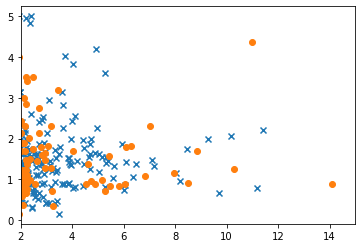

In [437]:
# Draw scatter plots of 
#             max coefficient feature of X_train - y_train as 'x' marker
#             max coefficient feature of X_test - y_test as 'o' marker
# xlim(2,10)
import matplotlib.pyplot as plt

## Max coefficient feature analysed above is Average Bedrooms
scatter_plot = plt.scatter(x_train['AveBedrms'], y_train, marker = "x")
scatter_plot = plt.scatter(x_test['AveBedrms'], y_test, marker = "o")
plt.xlim(2,15)